# Clustering et word2vec

Sur la base des éléments méthodologiques et des enseignements techniques présentés lors du cours théorique, il est demandé dans le cadre de ce TP :
- d’effectuer un clustering des bulletins pour une décennie au choix et d’interpréter les résultats
- d’entraîner un modèle word2vec sur l’ensemble des bulletins et d’explorer les relations entre vecteurs

Pour ce faire, vous utiliserez différentes librairies Python vues au cours comme scikit-learn et gensim.

## 1. Clustering

Pour réaliser cet exercice, je choisis de me pencher sur la décennie couvrant les années de 1960 à 1969. 

Tous les bulletins concernent la Ville de Bruxelles. Cependant, les rapports 'RptAn' apparraissent dans l'échantillonage. Mieux vaudrait les écarter.

In [110]:
# Choix de la décennie 1960 ; 

DECADE = '1960'

# PS : J'avais mal compris l'énoncé du tp au niveau de cette question, et pensais pouvoir choisir dans un intervalle de décennies. 
# Vous trouverez dans le draft 3, mon travail concernant la décennie de 1880.

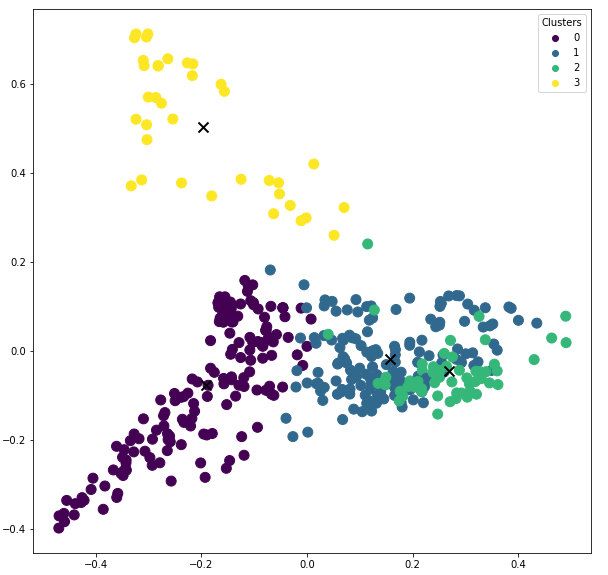

Pour commencer, j'ai évidemment testé les différentes possibilités au niveau du nombre de clusters. Il apparaît assez vite qu'avec un si grand nomnbre de fichiers, disparates, un nombre élevé de centres ne se révèle pas pertinent. Bien qu'avec quatre clusters, il semble se former des ensembles relativement uniformes, j'opte plutôt pour six car les clusters semblent relativement cohérents. 

Par ailleurs, selon moi, il faudrait pour bien faire procéder à un nettoyage plus poussé des fichiers et éventuellement écarter les tomes 'hybrides', ou du moins les identifier. Eliminer aussi les mots à hautes fréquences qui viennent brouiller le contenu informationnel du restant de l'échantillon.

In [ ]:
N_CLUSTERS = 6

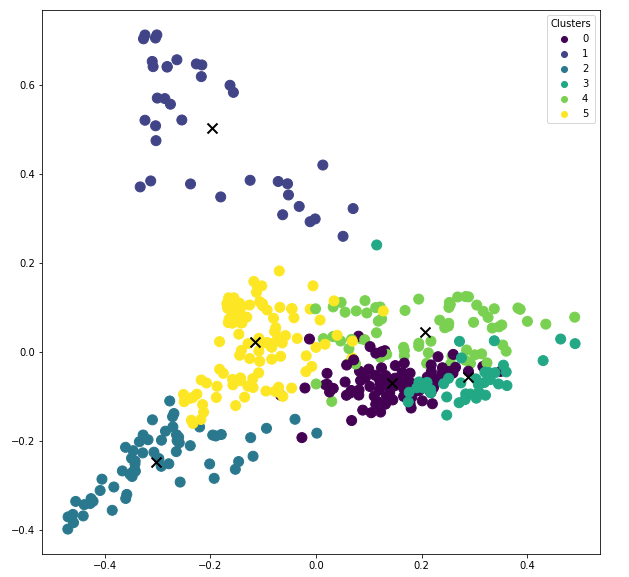

Avec six clusters, plutôt que quatre, deux autres clusters supplémentaires ressortent assez bien. 

Il semble que le cluster [3] soit assez cohérent, étant donné qu'il apparaît déjà tel quel lors du clustering à 4 dimensions. En regardant le détail de ce cluster, nous pouvons remarquer que les années reprises concernent exclusivement les années 1968 et 1969. Peut-être que le thème de la révolution de 68 en est-il la cause. Afin d'explorer plus finement ce cluster, je propose de sélectionner les fichiers de ce cluster et de procéder à la même opération pour identifier d'éventuels sous clusters à l'intérieur de celui-ci.

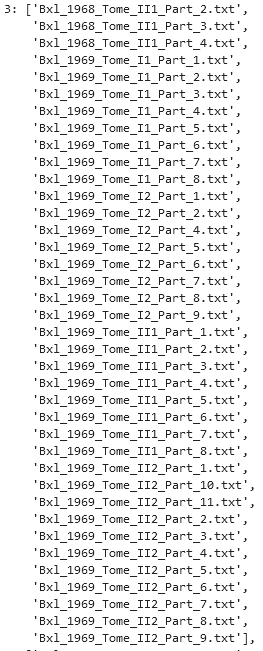

### Clustering d'un cluster

#### Exploration du cluster [3]

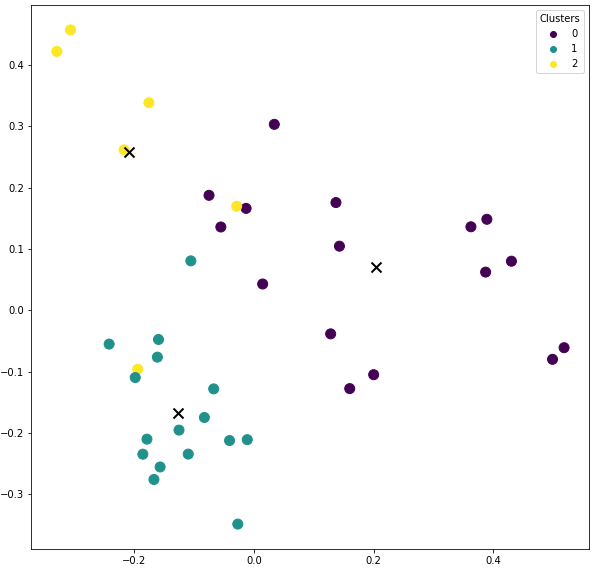

Nous aurions a priori envie d'aller explorer le cluster [1] qui est plus condensé que les deux autres. Après avoir exploré le texte des fichiers des trois clusters en affichant quelques lignes prises au hasard, je décide plutôt de me tourner vers l'amas [0]. Celui-ci est d'ailleurs plus dispersé et contient peut-être plusieurs ensembles cohérents.

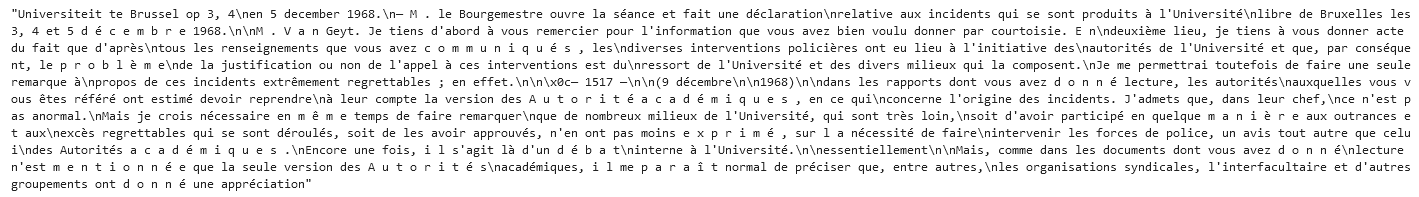

#### Exploration du cluster [3][0]

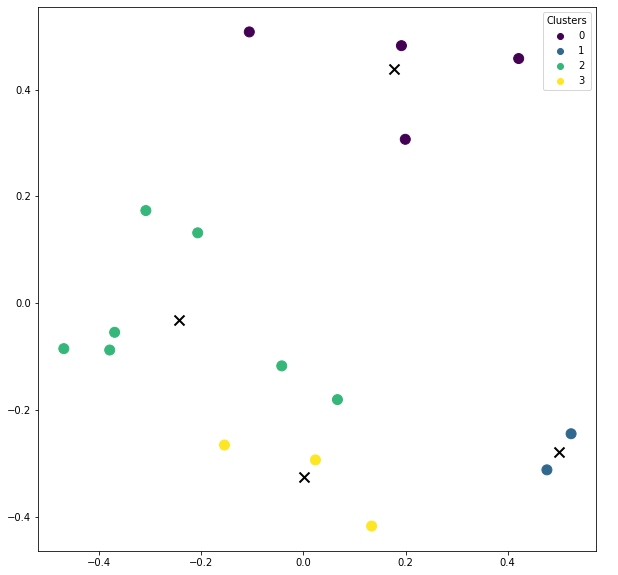

Il est difficile de juger de la pertinence des clusters sur un si grand nombre de fichiers, si ce n'est en se fiant au score 'cosine'. Il semble indispensable de pouvoir se faire une idée plus représentative du contenu. L'extraction de mots clés ou la générarion de wordclouds permettraient sans doute d'orienter mieux l'élimination des mots trop fréquents, donc peu informationnels. Tout en se faisant une idée de la pertinence des clusters. En rassemblant les fichiers et les traitant à l'aide de fonctions de nettoyage plus poussées, il doit plus facile d'éliminer des mots fréquents de l'ensemble afin d'explorer plus finement le contenu. Des listes de stopwords peuvent être consitutées en fonction des clusters et ainsi permettre de faire ressortir du contenu plus informationnel.

La technique du clustering représente beaucoup d'intérêt pour parvenir à classer les différents fichiers entre eux. Cela permettra aussi sans doute d'explorer et de découvrir des "thématiques" communes à des échantillons, éventuellement classés par décennie, pour une étude diachronique par exemple.

## 2. Word2Vec

Avant de procéder à l'amélioration du modèle en appliquant successivement les fonctions bigrammes/trigrammes/quadrigrammes/pentagrammes, j'ai d'abord procédé à l'exploration de différents caractéristiques déterminant la qualité des modèles. Le tableau ci-dessous reprend les résultats obtenus pour les mêmes requêtes, celles-ci étant calquées sur celles présentées au cours.

Le modèle_1 est celui entraîné sur le fichier intial, généré par le notebook concernant la segmentation du texte en phrases (fichier 'sents'). Tous les autres modèles se basent sur le fichier de Monsieur De Wilde, renommé en 'sents_2'. 

La taille du vecteur varie entre 32, 100 et 300, la taille de la fenêtre entre 5, 7, 10, 13, 20, 40, la fréquence minimale des mots entre 2 et 5, le nombre de 'workers' entre 2 et 5 et les 'epochs' entre 5 et 10. En procédant ainsi, j'espère approcher les différences entre les modèles en fonction des mêmes requêtes similaires appliquées à l'ensemble. 

Mes principales constations sont : 
- le nombre d''epochs' semble améliorer les performances des modèles quelque soit la taille du vecteur ;
- un nombre plus faible de 'workers' semble améliorer la précision des modèles mais nécessitent plus de temps de traitement
- la taille du vecteur et de la fenêtre augmentent la "sensibilité" des modèles ; ils semblent devenir plus "subtiles" mais peut-être moins "précis". 

Ainsi, avec une vecteur de 100 et une fenêtre de 7, le modèle parvient à comprendre que le charcutier est au plus proche du boucher par rapport aux autres métiers renseignés. Remarquons qu'avec un vecteur de 300, il faut élargir la taille du vecteur à 13 pour parvenir à un tel résultat.

J'opte donc a priori pour des modèles dont la taille de la fenêtre augmente en fonction de la taille du vecteur. Cependant, il faudra voir si l'application plus poussée des fonctions du Phraser ne vient pas perturber ces résultats. Quant à la fréquence des mots, je décide de l'abaisser à deux, jugeant qu'il est nécessaire pour Word2vec d'avoir un maximum d'information pour l'analyse. En outre, je favorise ainsi l'élimination des hapax souvent dûs aux erreurs de numérisation.

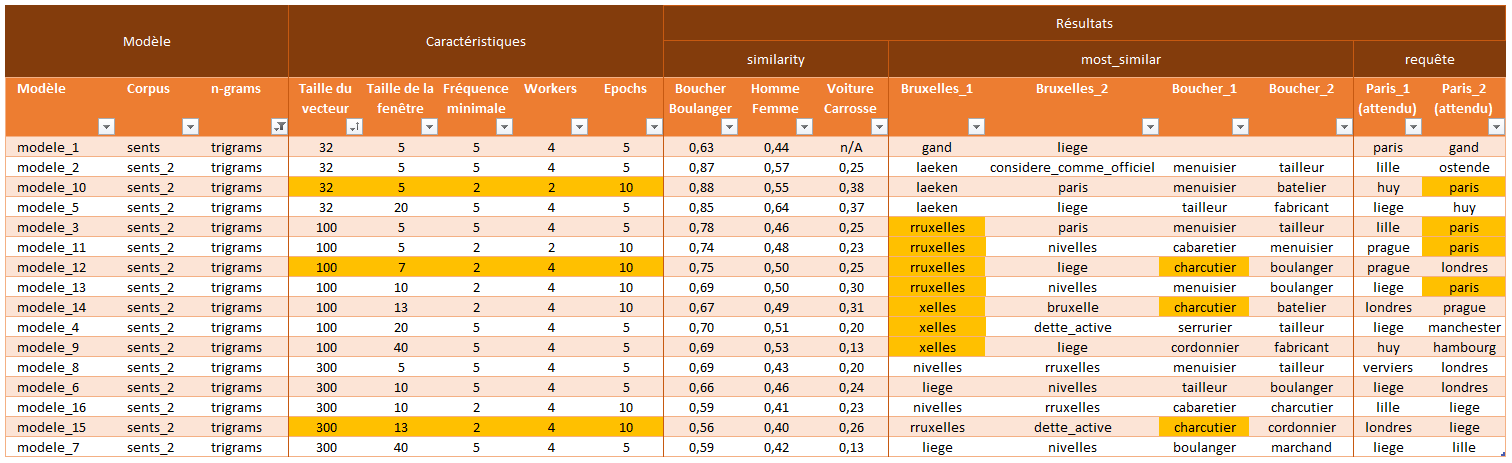

Tous les résultats sont disponibles dans le repo du module 4, dans les deux forks du notebook pour le word embeddings.

#### Création des bigrammes

In [5]:
bigram_phrases = Phrases(sentences)

In [8]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [10]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [11]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [12]:
quadrigram_phrases = Phrases(trigram_phraser[sentences])

In [13]:
quadrigram_phraser = Phraser(phrases_model=quadrigram_phrases)

In [14]:
pentagram_phrases = Phrases(quadrigram_phraser[sentences])

In [15]:
pentagram_phraser = Phraser(phrases_model=pentagram_phrases)

#### Analyse des modèles sur base des pentagrammes

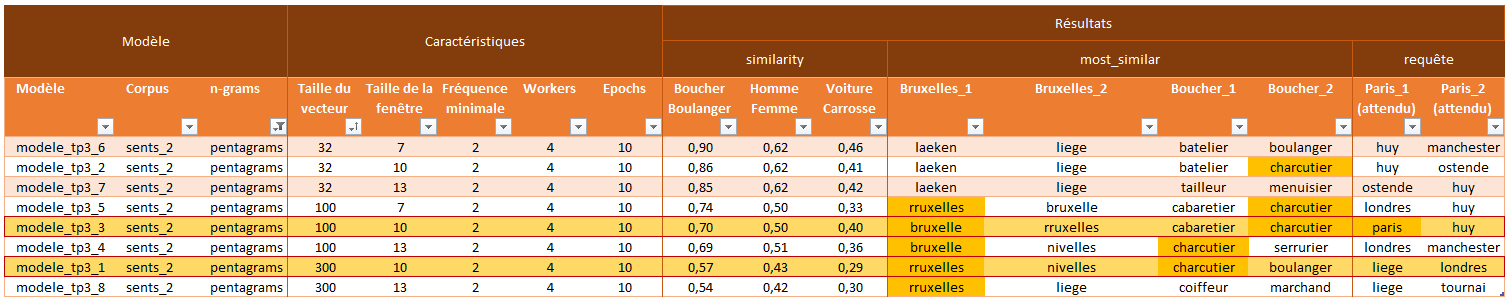

On remarque que - dans le cas des modèles se basant sur les Phrasers itératifs à cinq niveaux - la subtilité des modèles semblent augmenter. Le mot 'charcutier' remonte plus vite dans les résultats. Et le modèle tp3_3 identifie même la capitale de France : Paris. Notons, que le modèle tp3_1 identifie 'aristotélisme' comme étant proche de 'platonisme'. Ce dernier semble par contre perdre en précision dans la requête complexe, testant la capitale Paris.

Je choisis donc ces deux modèles pour les explorer plus en profondeur, à l'aide des fonctions 'similarity' et 'most_similar'.

#### Chargement des deux modèles

In [2]:
model_100 = Word2Vec.load("../data/bulletins_tp3_3.model")

In [13]:
model_300 = Word2Vec.load("../data/bulletins_tp3_1.model")

#### Exploration de la fonction 'similarity'

In [116]:
model_100.wv.similarity("pompier", "officier")

0.61370265

In [117]:
model_300.wv.similarity("pompier", "officier")

0.5023073

In [118]:
model_100.wv.similarity("maladie", "convalescence")

0.38469282

In [119]:
model_300.wv.similarity("maladie", "convalescence")

0.2292148

In [3]:
model_100.wv.similarity("maladie", "traitement")

0.32820603

In [14]:
model_300.wv.similarity("maladie", "traitement")

0.2652612

In [41]:
model_100.wv.similarity("ville", "campagne")

0.26645315

In [33]:
model_300.wv.similarity("ville", "campagne")

0.19255131

In [47]:
model_100.wv.similarity("blanc", "noir")

0.84282684

In [48]:
model_300.wv.similarity("blanc", "noir")

0.729584

Il convient de remarquer que, plus le modèle est 'subtile', plus le score de similarité baisse. Il semble normal qu'une plus grande précision amenée par un plus grand nombre de vecteurs, nuance la similirité entre deux termes, certes proches mais différents. 

Par ailleurs, je trouve que les scores de similarité sont relativement "ambigüs". Il peuvent indiquer des scores hauts ou bas pour des mots a priori opposés, bien que proche par nature (exemple: la couleur pour l'opposition entre noir et blanc). Ce score est donc plutôt à utiliser pour tester la compréhension du modèle pour des mots considérés comme proches (de "par nature") en français. Selon moi, pour tester les distances entre des mots éloignés, il vaut mieux utiliser les requêtes complexes.

#### Exploration de la fonction 'most_similar'

Je profite de cette fonction pour explorer des mots fréquents ressortis lors du tp2 afin d'explorer leur "signification" propre à notre corpus. Donc leur contenu informationnel.

In [120]:
model_100.wv.most_similar("assitance", topn=10)

[('badts', 0.9020717740058899),
 ('beguinagt', 0.9013281464576721),
 ('341bis', 0.8887001872062683),
 ('conducteuradjoint', 0.8853543996810913),
 ('sigmund', 0.885325014591217),
 ('35639', 0.884915292263031),
 ('chauffeursmecaniciens', 0.8843915462493896),
 ("';'", 0.8841107487678528),
 ('jor1s', 0.8836629986763),
 ('8008', 0.8827921748161316)]

In [15]:
model_300.wv.most_similar("assitance", topn=10)

[('soliloque', 0.7464151978492737),
 ('cretift', 0.7448118925094604),
 ('1426i', 0.7249847054481506),
 ('lxxxvin', 0.7245268821716309),
 ('ograpliie', 0.724136233329773),
 ('serviintercommude', 0.7204516530036926),
 ('trv', 0.7201919555664062),
 ('drytaael', 0.7191236019134521),
 ('algeheelheid', 0.7166889905929565),
 ('l120', 0.7151702046394348)]

In [4]:
model_100.wv.most_similar("entretien", topn=10)

[('entrelien', 0.8054344058036804),
 ('tretien', 0.706597089767456),
 ('enlrelien', 0.6608014702796936),
 ('entret', 0.6553846001625061),
 ('enlretien', 0.6465127468109131),
 ('reparation', 0.6188675761222839),
 ('hospitalisation', 0.5950733423233032),
 ('ameublement', 0.5872195959091187),
 ('arrosement', 0.5764084458351135),
 ('nettoyage', 0.5697656273841858)]

In [16]:
model_300.wv.most_similar("entretien", topn=10)

[('entrelien', 0.732262909412384),
 ('tretien', 0.6430491209030151),
 ('enlrelien', 0.581417441368103),
 ('entret', 0.5437759160995483),
 ('enlretien', 0.5422676801681519),
 ('refection', 0.4523935616016388),
 ('hospitalisation', 0.44925767183303833),
 ('eclairage', 0.44907066226005554),
 ('entretien_locatif', 0.44506317377090454),
 ('usage_exclusif', 0.4420177936553955)]

In [43]:
model_100.wv.most_similar("cours", topn=10)

[('cours_pratiques', 0.6983484029769897),
 ('cours_preparatoire', 0.6638883948326111),
 ('cours_speciaux', 0.648533821105957),
 ('cours_techniques', 0.6434221267700195),
 ('debut', 0.6305829882621765),
 ('cours_theoriques', 0.6229720115661621),
 ('cours_menagers', 0.612105667591095),
 ('professeur', 0.603455126285553),
 ('heures_consacrees', 0.5978484749794006),
 ('cours_facultatifs', 0.5949850678443909)]

In [42]:
model_300.wv.most_similar("cours", topn=10)

[('cours_pratiques', 0.5516554713249207),
 ('cours_speciaux', 0.5406738519668579),
 ('cours_theoriques', 0.5188175439834595),
 ('cours_generaux', 0.5150487422943115),
 ('cours_techniques', 0.5111157894134521),
 ('cours_preparatoire', 0.4871842563152313),
 ('debut', 0.4860787093639374),
 ('cours_superieurs', 0.4749787151813507),
 ('lecons', 0.4746241867542267),
 ('cours_menagers', 0.4736053943634033)]

#### Requêtes complexes

In [7]:
print(model_100.wv.most_similar(positive=['convalescence', 'credit'], negative=['maladie']))

[('subside', 0.6500080823898315), ('subside_annuel', 0.6421376466751099), ('credit_special', 0.6364462375640869), ('subside_extraordinaire', 0.6334735155105591), ('credit_extraordinaire', 0.6185612082481384), ('credit_supplementaire', 0.5864571332931519), ('credil', 0.5759154558181763), ('credit_alloue', 0.5512147545814514), ('second_credit_supplementaire', 0.5469581484794617), ('batiment_prefabrique', 0.5455600023269653)]


In [17]:
print(model_300.wv.most_similar(positive=['convalescence', 'credit'], negative=['maladie']))

[('credit_special', 0.5154436230659485), ('credit_extraordinaire', 0.4911023676395416), ('credit_supplementaire', 0.47469472885131836), ('subside', 0.46857431530952454), ('credil', 0.4648384749889374), ('subside_annuel', 0.4412742555141449), ('subside_extraordinaire', 0.43020889163017273), ('nouvel_etablissement', 0.41310009360313416), ('credit_alloue', 0.41146448254585266), ('credit_budgetaire', 0.40508177876472473)]


In [9]:
print(model_100.wv.most_similar(positive=['chien', 'enfant'], negative=['chat']))

[('age', 0.6486242413520813), ('adulte', 0.6073354482650757), ('individu', 0.5869765877723694), ('indigent', 0.5866605639457703), ('ouvrier', 0.5729239583015442), ('chaque_enfant', 0.5594813227653503), ('adolescent', 0.558224618434906), ('infirmite', 0.5505214929580688), ('malade', 0.5464586019515991), ('femme', 0.5383397340774536)]


In [18]:
print(model_300.wv.most_similar(positive=['chien', 'enfant'], negative=['chat']))

[('individu', 0.4828692078590393), ('mere', 0.4685194194316864), ('chaque_enfant', 0.46769121289253235), ('malade', 0.45745882391929626), ('enfants', 0.44908905029296875), ('femme', 0.44761595129966736), ('age', 0.44711846113204956), ('enfant_malade', 0.44067758321762085), ('affection', 0.4369041323661804), ('adolescent', 0.4353281259536743)]


In [10]:
print(model_100.wv.most_similar(positive=['noir', 'enfant'], negative=['blanc']))

[('adulte', 0.6703963279724121), ('individu', 0.6588932275772095), ('air_pur', 0.6316918134689331), ('cet_enfant', 0.6236950159072876), ('vieillard', 0.6189359426498413), ('adolescent', 0.6099064946174622), ('homme', 0.5976155996322632), ('malade', 0.5892374515533447), ('indigent', 0.5787951350212097), ('ecolier', 0.5772916674613953)]


In [19]:
print(model_300.wv.most_similar(positive=['noir', 'enfant'], negative=['blanc']))

[('individu', 0.5463488101959229), ('adulte', 0.5150238275527954), ('cet_enfant', 0.47613683342933655), ('enfants', 0.4760330617427826), ('education_morale', 0.47393277287483215), ('malade', 0.47121208906173706), ('jeune_homme', 0.4658198654651642), ('homme', 0.4657776355743408), ('jeune_garcon', 0.46298423409461975), ('indigent', 0.45729970932006836)]


In [39]:
print(model_100.wv.most_similar(positive=['securite', 'campagne'], negative=['ville']))

[('tranquillite', 0.6096832752227783), ('contamination', 0.5660967230796814), ('proprete', 0.5466688275337219), ('propagation', 0.539040207862854), ('detente', 0.5178829431533813), ('prevention', 0.5116077661514282), ('contagion', 0.5086106657981873), ('commodite', 0.5084385275840759), ('lumiere', 0.49884146451950073), ('aide_morale', 0.49366673827171326)]


In [31]:
print(model_300.wv.most_similar(positive=['securite', 'campagne'], negative=['ville']))

[('tranquillite', 0.47990450263023376), ('proprete', 0.4194595515727997), ('propagation', 0.40808725357055664), ('preservation', 0.3912057876586914), ('commodite', 0.3775981664657593), ('moralite', 0.3695998787879944), ('croissance', 0.3650842010974884), ('prevention', 0.3596031963825226), ('respiration', 0.3508452773094177), ('salubrite', 0.34927278757095337)]


In [40]:
print(model_100.wv.most_similar(positive=['sante', 'campagne'], negative=['ville']))

[('enfants_chetifs', 0.5950486660003662), ('maladie', 0.5759770274162292), ('colonie', 0.5480513572692871), ('debiles', 0.5114845633506775), ('surveillance_medicale', 0.5003782510757446), ('enfants_debiles', 0.4988692104816437), ('malingres', 0.49554550647735596), ('guerison', 0.4948507249355316), ('adenoides', 0.49482688307762146), ('sevres', 0.49455612897872925)]


In [32]:
print(model_300.wv.most_similar(positive=['sante', 'campagne'], negative=['ville']))

[('colonie', 0.42936834692955017), ('maladie', 0.4230324625968933), ('enfants_chetifs', 0.4129849970340729), ('mentaux', 0.38744693994522095), ('gheel', 0.386915385723114), ('affection', 0.38316917419433594), ('infirmes', 0.37833717465400696), ('service_chirurgical', 0.377943754196167), ('homes', 0.37639907002449036), ('sanle', 0.37078672647476196)]


In [38]:
print(model_100.wv.most_similar(positive=['fidelite', 'joie'], negative=['obeissance']))

[('fierte', 0.7036508321762085), ('tristesse', 0.7028921246528625), ('douleur', 0.7017102837562561), ('bonte', 0.6664937138557434), ('curiosite', 0.6661158204078674), ('perseverance', 0.6574430465698242), ('tenacite', 0.6569643020629883), ('excita', 0.6521251201629639), ('generosite', 0.6475568413734436), ('bonne_humeur', 0.6471173763275146)]


In [34]:
print(model_300.wv.most_similar(positive=['fidelite', 'joie'], negative=['obeissance']))

[('bonte', 0.613366961479187), ('fierte', 0.6126000285148621), ('douleur', 0.6100911498069763), ('passion', 0.5612075328826904), ('tristesse', 0.5516183972358704), ('gloire', 0.5477015972137451), ('sagesse', 0.5442857146263123), ('vitalite', 0.5331372618675232), ('cordialite', 0.5287707448005676), ('tenacite', 0.5252164602279663)]


In [37]:
print(model_100.wv.most_similar(positive=['fidelite', 'joie'], negative=['infidelite']))

[('bonte', 0.6609882116317749), ('bravoure', 0.6353232860565186), ('dignite', 0.6104191541671753), ('gaite', 0.6076962351799011), ('gratitude', 0.6073093414306641), ('droiture', 0.5978662371635437), ('des_dames_patronnesses', 0.5965664982795715), ('chose_publique', 0.5962206721305847), ('supreme', 0.5922481417655945), ('gloire', 0.5901403427124023)]


In [36]:
print(model_300.wv.most_similar(positive=['fidelite', 'joie'], negative=['infidelite']))

[('bonte', 0.5723008513450623), ('obeissance', 0.5228672027587891), ('douleur', 0.5131702423095703), ('chose_publique', 0.5035431385040283), ('gratitude', 0.4845524728298187), ('fierte', 0.48237642645835876), ('<<_je_jure', 0.48110663890838623), ('bonheur', 0.48084884881973267), ('courageux', 0.47602829337120056), ('victoire', 0.4699200689792633)]


In [46]:
print(model_100.wv.most_similar(positive=['officier', 'femme'], negative=['soldat']))

[('personne_chargee', 0.5822624564170837), ('infirmiere', 0.5777283310890198), ('assistante_sociale', 0.5485544800758362), ('maladie', 0.5378263592720032), ('division', 0.5286691188812256), ('division_centrale', 0.5274006128311157), ('agent', 0.5191535949707031), ('punition', 0.5111469030380249), ('gendarmerie', 0.5100896954536438), ('leur_comportement', 0.5063064694404602)]


In [45]:
print(model_300.wv.most_similar(positive=['officier', 'femme'], negative=['soldat']))

[('infirmiere', 0.45625606179237366), ('agent', 0.4190536439418793), ('servante', 0.413343220949173), ('assistante_sociale', 0.4076686203479767), ('aumonier', 0.3952755928039551), ('maladie', 0.3937314748764038), ('econome', 0.38731375336647034), ('officier_inspecteur', 0.3774641752243042), ('lingere', 0.37577560544013977), ('personne_chargee', 0.3737441599369049)]


#### Conclusion

On remarque que pour beaucoup de requêtes, le modèle_100 semble être plus précis et donner de meilleurs résultats (exemple: noir+enfant-blanc, convalescence+crédit-maladie). Les premières occurences sont souvent parlantes et nuancées (exemple: fidélité+joie-[obéissance ou infidélité]), tandis que le modèle_300 semble moins subtile. 

C'est d'ailleurs le modèle_100 qui avait bien identifié la capitale de la France, au contraire de tous les autres modèles (sauf le tout premier modèle entraîné sur un échantillonage de phrases 'sents').

À choisir, j'opterais donc plutôt pour le modèle_tp3_3 : vecteur 100, fenêtre 10. 